In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import sys
# import booleanNetwork module from ./src
sys.path.append('../src')
from BNMPy import booleanNetwork as bn
from BNMPy import BMatrix  
from BNMPy import vis

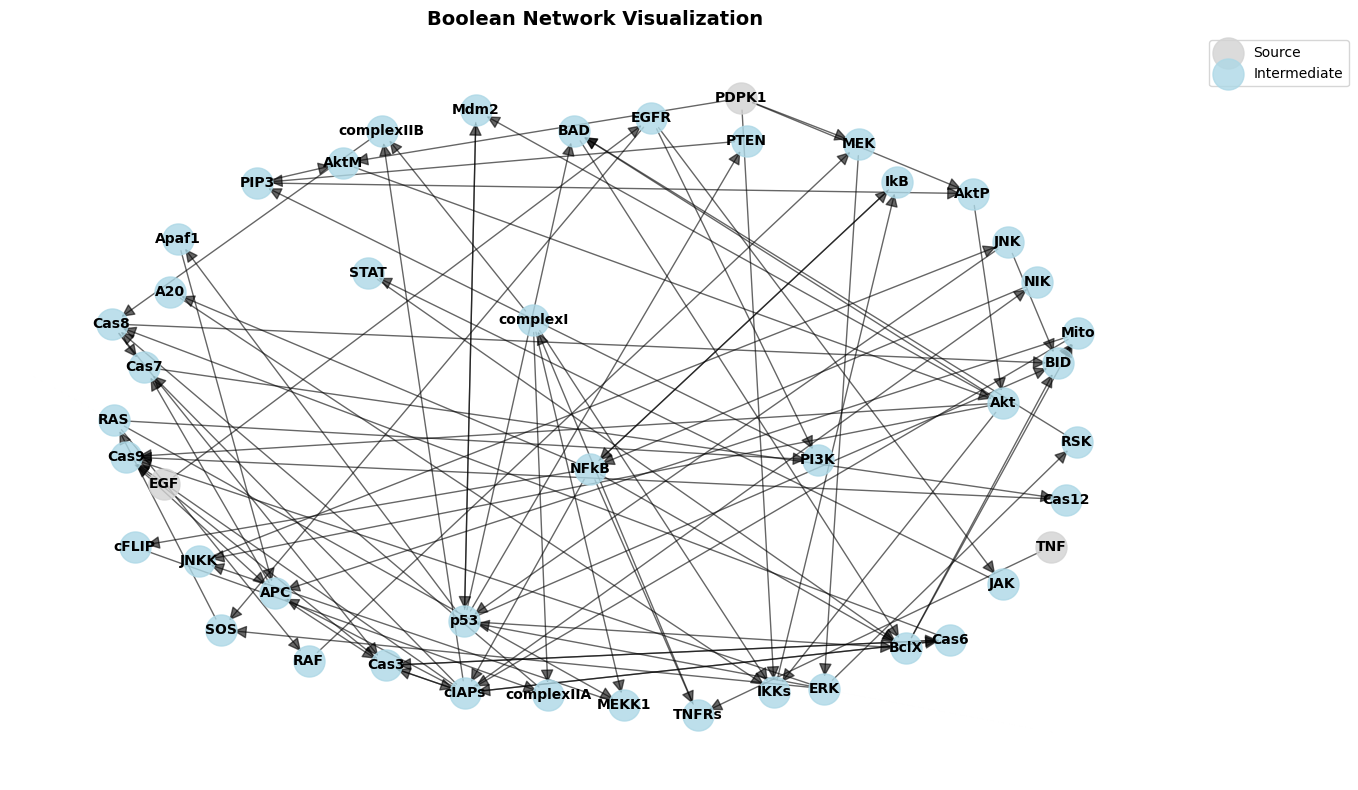

In [3]:
# load the logic rules from the file and visulize the logic graph
file = '../input_files/Eduati2020.txt'
logic_rules = vis.read_logic_rules(file)
vis.vis_network(logic_rules, interactive=False) # visualize the logic graph

In [ ]:
# alternatively, visualize the logic graph in an html file
vis.vis_network(logic_rules, output_html = "logic_graph.html", interactive=True)

In [ ]:
# load network
network = BMatrix.load_network_from_file(file)

In [9]:
# run the simulation
#%%time
noise_level = 0.05 # noise
y = network.update_noise ( noise_level  , 200000) # simulation with noise

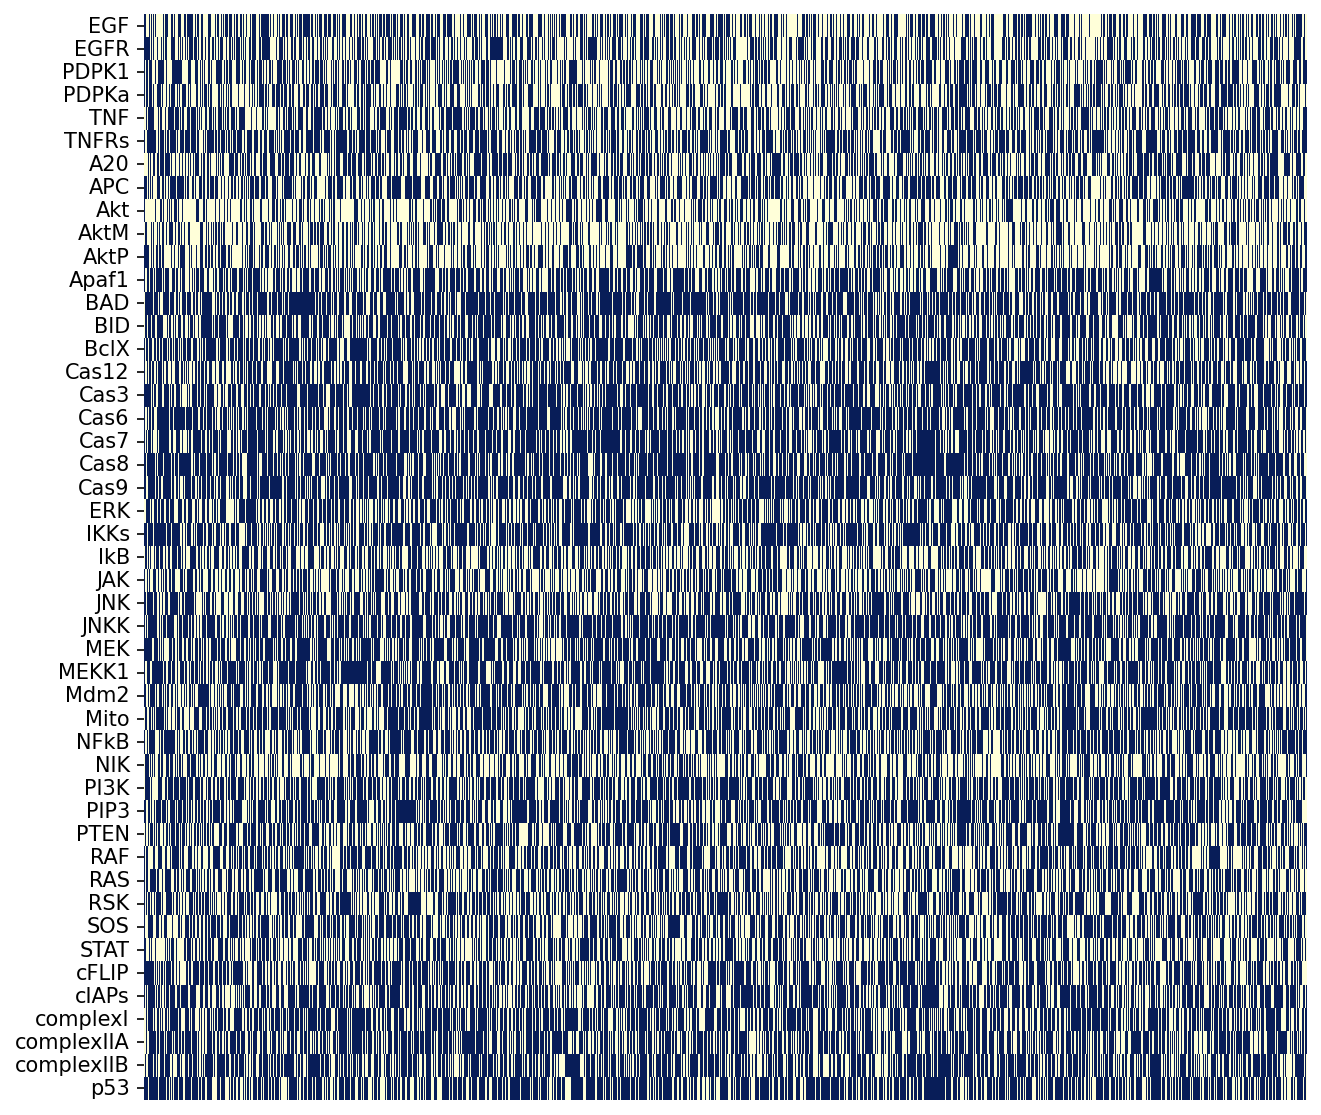

In [10]:
# plot the simulation results
simulations = pd.DataFrame(y) 
simulations.columns = gene_dict.keys()
plt.figure(figsize=(10,ngenes/5), dpi = 150)
# heapmap without clustering
sns.heatmap(simulations.transpose(), cmap="YlGnBu", cbar=False, xticklabels=False)
plt.show()

In [ ]:
def count_state_frequency(simulations):
    dic_freq = {}
    for i in range(0,simulations.shape[0]):
        cur = simulations.iloc[i,:]
        cur = ','.join([str(x) for x in cur])
        if cur in dic_freq.keys():
            dic_freq[cur] += 1
        else:
            dic_freq[cur] = 1
    result = pd.DataFrame()
    state_list = []
    freq_list = []
    for key in dic_freq.keys():
        state_list.append(key)
        freq_list.append((dic_freq[key]/simulations.shape[0]))
    result['state'] = state_list
    result['freq'] = freq_list
    result.index = state_list
    result = result.drop(columns=['state'])
    return result.sort_values(by=['freq'],ascending=False)

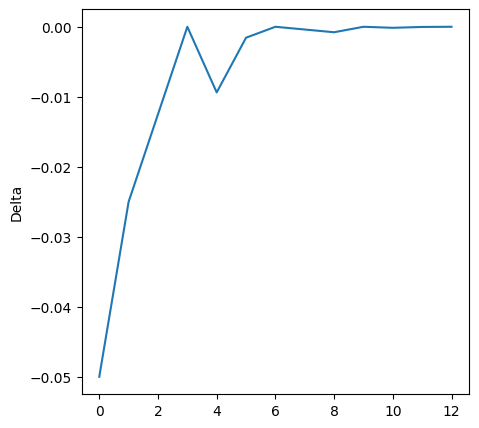

In [14]:
all = pd.DataFrame()
delta = []
pre = count_state_frequency(simulations)
for i in range(0,14):
    cur = count_state_frequency(simulations.iloc[2**i*10:2**(i+1)*10,:])
    cur.columns = ["S"+str(i)]
    if i > 0:
        delta.append(cur.iloc[0,].values[0] - pre.iloc[0,].values[0])
    pre = cur
    all = pd.concat([all,cur],axis=1)

plt.figure(figsize=(5,5))
plt.ylabel("Delta")
plt.plot(delta)